In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from utils import *

In [3]:
%load_ext autoreload
%autoreload 2
from rbm_qst import RBM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [383]:
n_vis = 10  # Number of visible neurons.
n_hid = 9  # Number of hidden neurons.

ratio = n_hid / n_vis  # Expressive power.

print(ratio)

0.9


# Dataset generation for simplest W state

[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


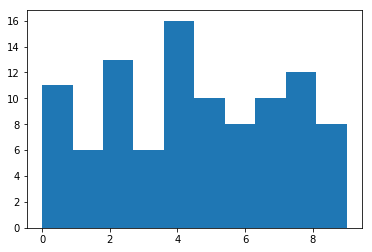

In [384]:
num_samples = 100

sparsed_states = np.eye(n_vis)
random_indices = np.random.randint(0, n_vis, num_samples)
dataset = []
for i in random_indices:
    dataset.append(sparsed_states[i])

dataset = np.array(dataset)
print(dataset[0])

plt.hist(random_indices, bins=n_vis);

# Calculating gradient

In [385]:
params = {
    "lambda": {
        "W": np.random.random((n_hid, n_vis)),  # Weights matrix.
        "b": np.random.random(n_vis),  # Biases to visible neurons.
        "c": np.random.random(n_hid)  # Biases to hidden neurons.
    },

    "mu": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    }
}

grad_lambda_ksi(dataset, params)

{'W': array([[ 0.05956665,  0.0382901 ,  0.0934186 ,  0.04290065,  0.12050537,
          0.07179589,  0.04402046,  0.06802827,  0.07960534,  0.05998158],
        [ 0.07948438,  0.04034746,  0.09627401,  0.03856823,  0.10526916,
          0.07665113,  0.05922961,  0.0758443 ,  0.09566589,  0.05504962],
        [ 0.06572289,  0.03912026,  0.09209506,  0.04378705,  0.10664917,
          0.07663542,  0.04874636,  0.0575728 ,  0.09080995,  0.05078702],
        [ 0.08674887,  0.05077832,  0.10187702,  0.04776871,  0.11993283,
          0.07607365,  0.06705298,  0.0824626 ,  0.10086178,  0.06614961],
        [ 0.07900208,  0.04237903,  0.10263336,  0.0475869 ,  0.10396398,
          0.08117886,  0.06466775,  0.07213599,  0.08522879,  0.0660172 ],
        [ 0.06118361,  0.04173895,  0.07565553,  0.03116108,  0.087813  ,
          0.0543844 ,  0.04633233,  0.06783256,  0.07882494,  0.04830686],
        [ 0.08195409,  0.04332498,  0.10948587,  0.04451362,  0.1333641 ,
          0.07787877,  0.06

# RBM Training...

In [107]:
n_vis = 5  # Number of visible neurons.
n_hid = 5  # Number of hidden neurons.

params = {
    "lambda": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    },

    "mu": {
        "W": np.random.random((n_hid, n_vis)),
        "b": np.random.random(n_vis),
        "c": np.random.random(n_hid)
    }
}

r = RBM(n_vis, n_hid, params, debug_print=True)

In [380]:
r.train(dataset, max_epochs=1000, learning_rate=0.01)

# Research...

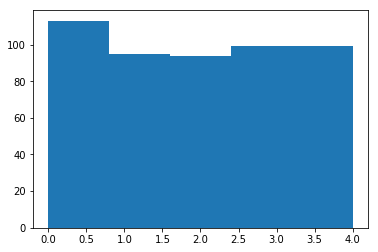

In [345]:
n_vis = 5
n_hid = 5

num_samples = 500
sparsed_states = np.eye(n_vis)
random_indices = np.random.randint(0, n_vis, num_samples)
dataset = []
for i in random_indices:
    dataset.append(sparsed_states[i])
dataset = np.array(dataset)

plt.hist(random_indices, bins=n_vis);

In [379]:
r = RBM(n_vis, n_hid)  # RBM from rbm_qst.py

r.train(dataset, dataset, max_epochs=1000, overlap_each=40, onum_samples=1000,
        onum_steps=10, learning_rate=0.03, overlap=False, debug=True)

Calculating overlap:

In [365]:
num_samples = 1000
num_steps = 100

sampled_from_RBM = np.array([r.daydream(num_steps)[-1] for _ in range(num_samples)])
sampled_from_RBM = into_dict(sampled_from_RBM)

ideal_state = into_dict(sparsed_states)

fidelity_dicts(ideal_state, sampled_from_RBM)

0.344220226325125

## Use classical RBM

In [373]:
import rbm_classic

In [377]:
r_cl = rbm_classic.RBM(n_vis, n_hid)  # RBM from rbm_classic.py

r_cl.train(dataset, max_epochs=1000, learning_rate=0.5)

Calculating overlap:

In [378]:
num_samples = 1000
num_steps = 100

sampled_from_RBM_cl = np.array([r_cl.daydream(num_steps)[-1] for _ in range(num_samples)])
sampled_from_RBM_cl = into_dict(sampled_from_RBM_cl)

ideal_state = into_dict(sparsed_states)

fidelity_dicts(ideal_state, sampled_from_RBM_cl)

0.87714370442984813